In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [295]:
import warnings
warnings.filterwarnings('ignore')

In [296]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [297]:
df.info() # No Null values accross the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [298]:
df.duplicated().sum() # Confirms no duplicate row

0

In [299]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [300]:
#df["symboling"].value_counts() --Checking for spelling inconsistencies for categorical varables

In [301]:
df["MakeOrBrand"] = df["CarName"].str.split().str.get(0) #Adding Make/Brand column to capture Brand Perception weightage

In [302]:
df["MakeOrBrand"].isnull().sum() # No null value in created coulumn

0

In [303]:
cat = ['MakeOrBrand','symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem']

In [304]:
df1 = pd.get_dummies(df[cat],drop_first=True)

In [305]:
df1.columns

Index(['symboling', 'MakeOrBrand_alfa-romero', 'MakeOrBrand_audi',
       'MakeOrBrand_bmw', 'MakeOrBrand_buick', 'MakeOrBrand_chevrolet',
       'MakeOrBrand_dodge', 'MakeOrBrand_honda', 'MakeOrBrand_isuzu',
       'MakeOrBrand_jaguar', 'MakeOrBrand_maxda', 'MakeOrBrand_mazda',
       'MakeOrBrand_mercury', 'MakeOrBrand_mitsubishi', 'MakeOrBrand_nissan',
       'MakeOrBrand_peugeot', 'MakeOrBrand_plymouth', 'MakeOrBrand_porcshce',
       'MakeOrBrand_porsche', 'MakeOrBrand_renault', 'MakeOrBrand_saab',
       'MakeOrBrand_subaru', 'MakeOrBrand_toyota', 'MakeOrBrand_toyouta',
       'MakeOrBrand_vokswagen', 'MakeOrBrand_volkswagen', 'MakeOrBrand_volvo',
       'MakeOrBrand_vw', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
      

In [306]:
colnumeric = ["wheelbase","carlength","carwidth","carheight","curbweight","enginesize",
              "boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

In [307]:
dfml = pd.concat([df[colnumeric],df1],axis=1)

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
np.random.seed(0)
df_train, df_test = train_test_split(dfml, train_size = 0.7, test_size = 0.3, random_state = 100)

In [310]:
df_train.shape

(143, 71)

In [311]:
df_test.shape

(62, 71)

In [312]:
#df_train.columns

In [313]:
from sklearn.preprocessing import MinMaxScaler

In [314]:
scaler = MinMaxScaler()

In [315]:
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])

In [316]:
df_train[:1]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15,0.083333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
from sklearn.linear_model import LinearRegression

In [318]:
lr = LinearRegression()

In [319]:
y_train = df_train.pop('price')
X_train = df_train

In [320]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])

In [324]:
y_test = df_test.pop('price')
X_test = df_test

In [325]:
y_pred = lr.predict(X_test)

In [326]:
from sklearn.metrics import r2_score

In [327]:
r2_score(y_test, y_pred)

0.8171976727778472

In [328]:
y_train_pred = lr.predict(X_train)

In [329]:
r2_score(y_train, y_train_pred)

0.9750026623336441

Text(0.5, 1.0, 'on mark Prediction on train set')

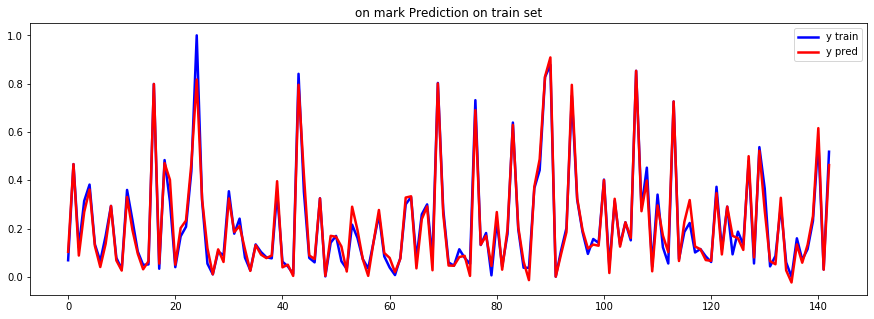

In [330]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_train)),y_train,label="y train",color="blue",linewidth=2.5)
plt.plot(range(len(y_train)),y_train_pred,label="y pred",color="red",linewidth=2.5)
plt.legend()#Correct prediction on test set
plt.title("on mark Prediction on train set")

Text(0.5, 1.0, 'prediction on test/unseen data-set')

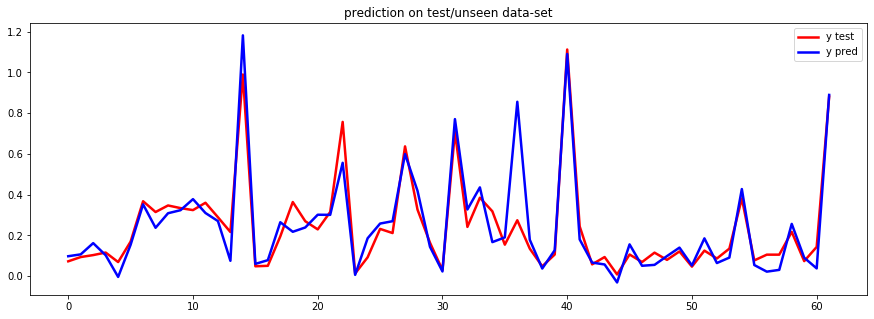

In [340]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)),y_test,label="y test",color="red",linewidth=2.5)
plt.plot(range(len(y_test)),y_pred,label="y pred",color="blue",linewidth=2.5)
plt.legend()
plt.title("prediction on test/unseen data-set")

In [332]:
#Using RFE to eliminate features not able to explain price variation using RFE

In [342]:
from sklearn.feature_selection import RFE

In [343]:
lr1 = LinearRegression()

In [344]:
selector = RFE(lr1, 16, step=1)

In [345]:
selector = selector.fit(X_train,y_train)

In [346]:
selector.support_

array([False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False])

In [347]:
selector.ranking_

array([11, 15,  1, 12,  1,  1,  1,  1, 19,  9, 10, 33, 20, 38, 41, 31,  1,
       32, 17, 14, 16, 46, 21, 39, 43, 53,  7, 44,  1, 13, 51,  1, 34,  3,
        5, 47, 40, 52, 48,  2, 37, 23,  8, 45, 25, 24, 26, 27, 49, 36,  1,
        6,  1, 50,  4, 35,  1,  1,  1, 22,  1,  1,  1, 42, 28, 18, 54, 30,
       29, 55])

In [355]:
col_sel=X_train.columns[selector.support_]

In [357]:
#Addding price to column seleted
col_sel =['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'MakeOrBrand_bmw', 'MakeOrBrand_peugeot', 'MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two','price']

In [358]:
dfml_sel = dfml[col_sel]

In [359]:
dfml_sel.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'MakeOrBrand_bmw', 'MakeOrBrand_peugeot', 'MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'price'],
      dtype='object')

In [360]:
np.random.seed(0)
df_train_s, df_test_s = train_test_split(dfml_sel, train_size = 0.7, test_size = 0.3, random_state = 100)

In [361]:
from sklearn.preprocessing import MinMaxScaler

In [362]:
scaler1 = MinMaxScaler()

In [363]:
df_train_s[df_train_s.columns] = scaler1.fit_transform(df_train_s[df_train_s.columns])

In [364]:
df_train_s[:1]

,carwidth,curbweight,enginesize,boreratio,stroke,MakeOrBrand_bmw,MakeOrBrand_peugeot,MakeOrBrand_porsche,enginelocation_rear,enginetype_l,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,price
122,0.291667,0.272692,0.139623,0.230159,0.525253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068818


In [365]:
y_train_s = df_train_s.pop('price')
X_train_s = df_train_s

In [366]:
lr1.fit(X_train_s,y_train_s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [367]:
df_test_s[df_test_s.columns] = scaler1.transform(df_test_s[df_test_s.columns])

In [368]:
y_test_s = df_test_s.pop('price')
X_test_s = df_test_s

In [369]:
y_pred_s = lr1.predict(X_test_s)

In [167]:
#y_pred_sel = lr1.predict(X_test_scaled_sel)

In [370]:
r2_score(y_test_s, y_pred_s)

0.889047100074386

In [371]:
y_train_pred_s = lr1.predict(X_train_s)

In [372]:
r2_score(y_train_s, y_train_pred_s)

0.9394469301652291

In [373]:
dfml_sel.drop("price",axis=1).columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'MakeOrBrand_bmw', 'MakeOrBrand_peugeot', 'MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

Text(0.5, 1.0, 'Coefficients')

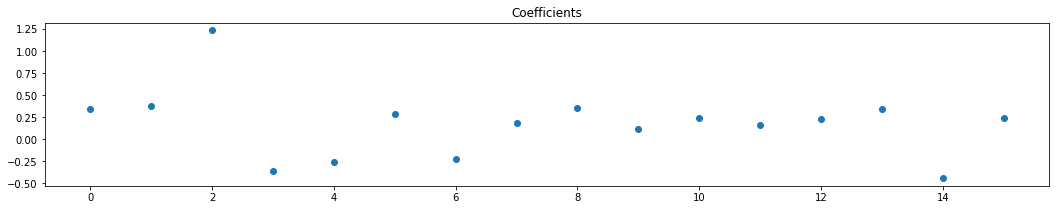

In [374]:
plt.figure(figsize=(18,3))
plt.plot(range(len(lr1.coef_)),lr1.coef_,"o")
plt.title("Coefficients")

Text(0.5, 1.0, 'on mark Prediction on train set')

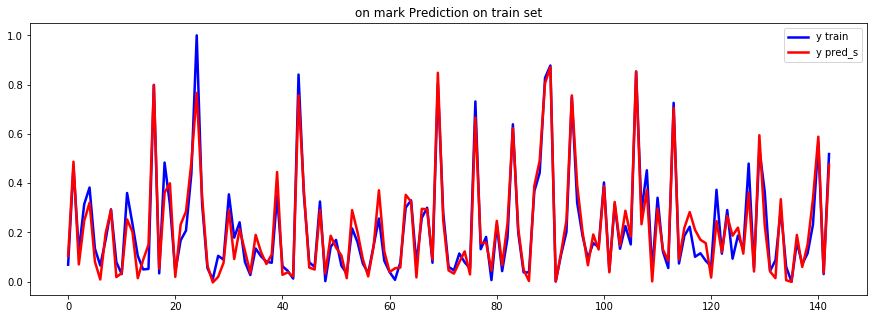

In [376]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_train_s)),y_train_s,label="y train",color="blue",linewidth=2.5)
plt.plot(range(len(y_train_s)),y_train_pred_s,label="y pred_s",color="red",linewidth=2.5)
plt.legend()#Correct prediction on test set
plt.title("on mark Prediction on train set")

Text(0.5, 1.0, 'prediction on test/unseen data-set')

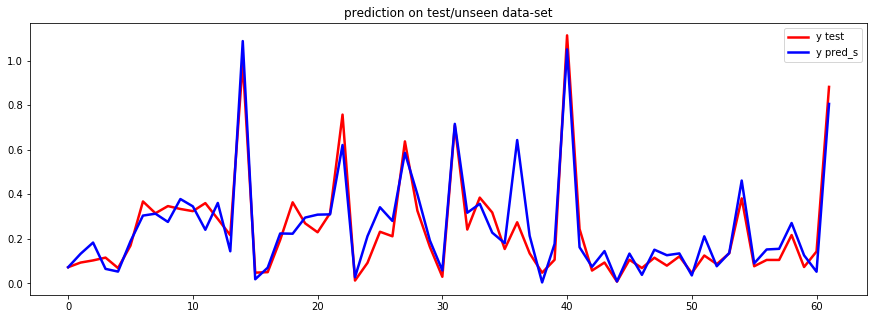

In [377]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test_s)),y_test_s,label="y test",color="red",linewidth=2.5)
plt.plot(range(len(y_test_s)),y_pred_s,label="y pred_s",color="blue",linewidth=2.5)
plt.legend()
plt.title("prediction on test/unseen data-set")

In [378]:
features = dfml_sel.drop("price",axis=1).columns

In [379]:
coefficients = lr1.coef_

In [380]:
fdf = pd.DataFrame({"Features":features,"Coef":coefficients})

In [381]:
fdf # Features and coefficients selected of linear model

,Features,Coef
0,carwidth,0.347104
1,curbweight,0.378501
2,enginesize,1.237243
3,boreratio,-0.358136
4,stroke,-0.263932
5,MakeOrBrand_bmw,0.282122
6,MakeOrBrand_peugeot,-0.224509
7,MakeOrBrand_porsche,0.177912
8,enginelocation_rear,0.350632
9,enginetype_l,0.115374


In [383]:
dfml_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
carwidth                 205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
MakeOrBrand_bmw          205 non-null uint8
MakeOrBrand_peugeot      205 non-null uint8
MakeOrBrand_porsche      205 non-null uint8
enginelocation_rear      205 non-null uint8
enginetype_l             205 non-null uint8
enginetype_rotor         205 non-null uint8
cylindernumber_five      205 non-null uint8
cylindernumber_four      205 non-null uint8
cylindernumber_three     205 non-null uint8
cylindernumber_twelve    205 non-null uint8
cylindernumber_two       205 non-null uint8
price                    205 non-null float64
dtypes: float64(4), int64(2), uint8(11)
memory usage: 11.9 KB


In [391]:
dfml_sel.head()

,carwidth,curbweight,enginesize,boreratio,stroke,MakeOrBrand_bmw,MakeOrBrand_peugeot,MakeOrBrand_porsche,enginelocation_rear,enginetype_l,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,price
0,64.1,2548,130,3.47,2.68,0,0,0,0,0,0,0,1,0,0,0,13495.0
1,64.1,2548,130,3.47,2.68,0,0,0,0,0,0,0,1,0,0,0,16500.0
2,65.5,2823,152,2.68,3.47,0,0,0,0,0,0,0,0,0,0,0,16500.0
3,66.2,2337,109,3.19,3.40,0,0,0,0,0,0,0,1,0,0,0,13950.0
4,66.4,2824,136,3.19,3.40,0,0,0,0,0,0,1,0,0,0,0,17450.0


In [392]:
from sklearn.preprocessing import MinMaxScaler

In [393]:
scaler2 = MinMaxScaler()

In [394]:
dfml_sel[dfml_sel.columns] = scaler2.fit_transform(dfml_sel[dfml_sel.columns])

In [395]:
dfml_sel.head()

,carwidth,curbweight,enginesize,boreratio,stroke,MakeOrBrand_bmw,MakeOrBrand_peugeot,MakeOrBrand_porsche,enginelocation_rear,enginetype_l,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,price
0,0.316667,0.411171,0.260377,0.664286,0.290476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.207959
1,0.316667,0.411171,0.260377,0.664286,0.290476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.282558
2,0.433333,0.517843,0.343396,0.100000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
3,0.491667,0.329325,0.181132,0.464286,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.219254
4,0.508333,0.518231,0.283019,0.464286,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.306142


In [396]:
y = dfml_sel.pop('price')
X = dfml_sel

In [400]:
import statsmodels.api as sm # importing stats model api

In [401]:
# Add a constant
X_lm = sm.add_constant(X)

In [402]:
X_lm.shape

(205, 17)

In [403]:
y.shape

(205,)

In [404]:
lr = sm.OLS(y, X_lm).fit()

In [ ]:
#lr.params

In [405]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          7.00e-102
Time:                        12:57:34   Log-Likelihood:                 314.74
No. Observations:                 205   AIC:                            -599.5
Df Residuals:                     190   BIC:                            -549.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

Text(0.5, 0, 'Errors')

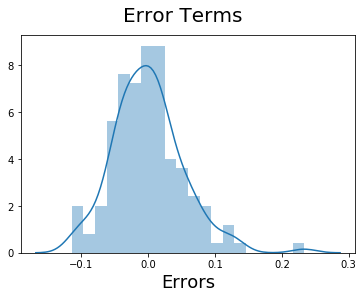

In [406]:
fig = plt.figure()
sns.distplot((y_train_s - y_train_pred_s), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)# Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [408]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [409]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,MakeOrBrand_peugeot,inf
9,enginetype_l,inf
10,enginetype_rotor,inf
13,cylindernumber_three,inf
15,cylindernumber_two,inf
1,curbweight,49.52
2,enginesize,46.69
0,carwidth,41.05
3,boreratio,33.32
4,stroke,20.57


In [412]:
sel=['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'] #Dropping 'MakeOrBrand_peugeot'

In [413]:
X = dfml_sel[sel]

In [415]:
X_lm = sm.add_constant(X)

In [416]:
lr = sm.OLS(y, X_lm).fit()

In [417]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          7.00e-102
Time:                        13:09:57   Log-Likelihood:                 314.74
No. Observations:                 205   AIC:                            -599.5
Df Residuals:                     190   BIC:                            -549.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [418]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
14,cylindernumber_two,inf
1,curbweight,49.52
2,enginesize,46.69
0,carwidth,41.05
3,boreratio,33.32
4,stroke,20.57
11,cylindernumber_four,20.56
10,cylindernumber_five,2.43
7,enginelocation_rear,1.77


In [419]:
sel=['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'] # Dropping enginetype_rotor

In [420]:
X = dfml_sel[sel]

In [421]:
X_lm = sm.add_constant(X)

In [422]:
lr = sm.OLS(y, X_lm).fit()

In [423]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          7.00e-102
Time:                        13:12:28   Log-Likelihood:                 314.74
No. Observations:                 205   AIC:                            -599.5
Df Residuals:                     190   BIC:                            -549.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [424]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,49.52
2,enginesize,46.69
0,carwidth,41.05
3,boreratio,33.32
4,stroke,20.57
10,cylindernumber_four,20.56
9,cylindernumber_five,2.43
13,cylindernumber_two,2.35
7,enginelocation_rear,1.77
8,enginetype_l,1.73


In [425]:
sel=['carwidth', 'enginesize', 'boreratio', 'stroke',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'] #Dropping curbweight

In [426]:
X = dfml_sel[sel]
X_lm = sm.add_constant(X)
lr = sm.OLS(y, X_lm).fit()

In [427]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.63e-97
Time:                        13:15:09   Log-Likelihood:                 299.90
No. Observations:                 205   AIC:                            -571.8
Df Residuals:                     191   BIC:                            -525.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [428]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,38.97
0,carwidth,32.57
2,boreratio,30.89
3,stroke,20.55
9,cylindernumber_four,20.26
8,cylindernumber_five,2.42
12,cylindernumber_two,2.34
6,enginelocation_rear,1.76
5,MakeOrBrand_porsche,1.66
11,cylindernumber_twelve,1.57


In [429]:
sel=['carwidth', 'boreratio', 'stroke',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'] #Dropping enginesize

In [430]:
X = dfml_sel[sel]
X_lm = sm.add_constant(X)
lr = sm.OLS(y, X_lm).fit()

In [431]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     97.16
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.03e-74
Time:                        13:18:10   Log-Likelihood:                 241.79
No. Observations:                 205   AIC:                            -457.6
Df Residuals:                     192   BIC:                            -414.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [432]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.40
1,boreratio,18.63
2,stroke,13.31
8,cylindernumber_four,6.50
5,enginelocation_rear,1.68
4,MakeOrBrand_porsche,1.62
7,cylindernumber_five,1.58
6,enginetype_l,1.40
9,cylindernumber_three,1.23
3,MakeOrBrand_bmw,1.18


In [433]:
sel=['boreratio', 'stroke',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'] #Dropping carwidth

In [436]:
X = dfml_sel[sel]
X_lm = sm.add_constant(X)
lr = sm.OLS(y, X_lm).fit()

In [435]:
# Print a summary of the linear regression model obtained
print(lr.summary())#significant drop in R-squared

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     58.51
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.96e-55
Time:                        13:22:26   Log-Likelihood:                 191.62
No. Observations:                 205   AIC:                            -359.2
Df Residuals:                     193   BIC:                            -319.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [437]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,8.82
0,boreratio,8.05
7,cylindernumber_four,5.45
3,MakeOrBrand_porsche,1.60
4,enginelocation_rear,1.55
6,cylindernumber_five,1.42
5,enginetype_l,1.25
2,MakeOrBrand_bmw,1.17
8,cylindernumber_three,1.13
10,cylindernumber_two,1.12


In [442]:
sel=['carwidth',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'] #Dropping enginesize,boreratio and stroke

In [443]:
X = dfml_sel[sel]
X_lm = sm.add_constant(X)
lr = sm.OLS(y, X_lm).fit()

In [444]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           7.78e-75
Time:                        13:29:58   Log-Likelihood:                 237.01
No. Observations:                 205   AIC:                            -452.0
Df Residuals:                     194   BIC:                            -415.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [445]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,4.14
6,cylindernumber_four,3.02
2,MakeOrBrand_porsche,1.58
5,cylindernumber_five,1.52
3,enginelocation_rear,1.50
4,enginetype_l,1.25
1,MakeOrBrand_bmw,1.12
7,cylindernumber_three,1.10
9,cylindernumber_two,1.07
8,cylindernumber_twelve,1.06


In [451]:
sel=['carwidth',
       'MakeOrBrand_bmw','MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two','price']# adding price

In [452]:
dfml_sel = dfml[sel]

In [453]:
dfml_sel.columns

Index(['carwidth', 'MakeOrBrand_bmw', 'MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'price'],
      dtype='object')

In [455]:
np.random.seed(0)
df_train_s, df_test_s = train_test_split(dfml_sel, train_size = 0.7, test_size = 0.3, random_state = 100)

In [456]:
from sklearn.preprocessing import MinMaxScaler

In [457]:
scaler5 = MinMaxScaler()

In [458]:
df_train_s[df_train_s.columns] = scaler5.fit_transform(df_train_s[df_train_s.columns])

In [459]:
df_train_s[:1]

,carwidth,MakeOrBrand_bmw,MakeOrBrand_porsche,enginelocation_rear,enginetype_l,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,price
122,0.291667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068818


In [460]:
y_train_s = df_train_s.pop('price')
X_train_s = df_train_s

In [462]:
from sklearn.linear_model import LinearRegression

In [463]:
lr5 = LinearRegression()

In [464]:
lr5.fit(X_train_s,y_train_s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [465]:
df_test_s[df_test_s.columns] = scaler5.transform(df_test_s[df_test_s.columns])

In [466]:
y_test_s = df_test_s.pop('price')
X_test_s = df_test_s

In [467]:
y_pred_s = lr5.predict(X_test_s)

In [468]:
r2_score(y_test_s, y_pred_s)

0.827047467332986

In [469]:
y_train_pred_s = lr5.predict(X_train_s)

In [470]:
r2_score(y_train_s, y_train_pred_s)

0.8603928142557127

Text(0.5, 1.0, 'on mark Prediction on train set')

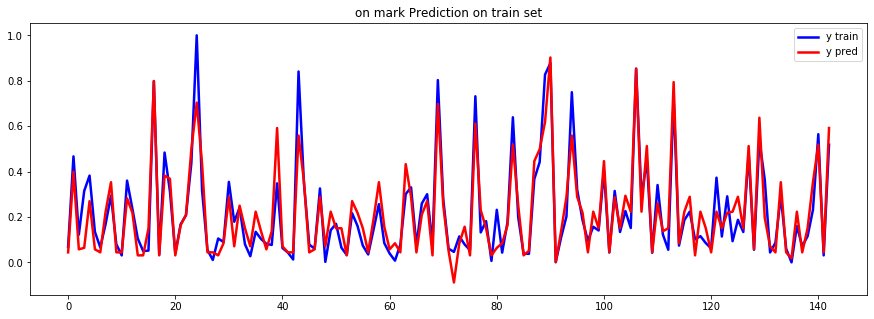

In [471]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_train_s)),y_train_s,label="y train",color="blue",linewidth=2.5)
plt.plot(range(len(y_train_s)),y_train_pred_s,label="y pred",color="red",linewidth=2.5)
plt.legend()#Correct prediction on test set
plt.title("on mark Prediction on train set")

Text(0.5, 1.0, 'prediction on test/unseen data-set')

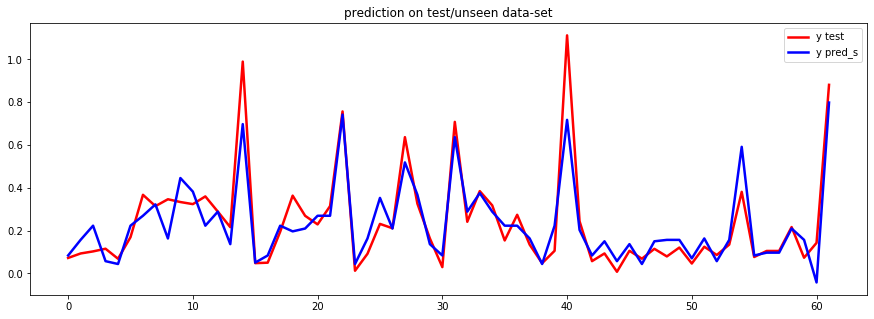

In [472]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test_s)),y_test_s,label="y test",color="red",linewidth=2.5)
plt.plot(range(len(y_test_s)),y_pred_s,label="y pred_s",color="blue",linewidth=2.5)
plt.legend()
plt.title("prediction on test/unseen data-set")

Text(0.5, 0, 'Errors')

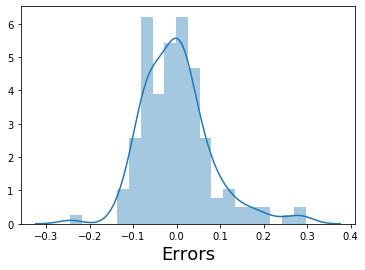

In [473]:
ig = plt.figure()
sns.distplot((y_train_s - y_train_pred_s), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)# Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [474]:
features = X_train_s.columns

Index(['carwidth', 'MakeOrBrand_bmw', 'MakeOrBrand_porsche',
       'enginelocation_rear', 'enginetype_l', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [476]:
coefficients = lr5.coef_

In [477]:
final_model = pd.DataFrame({"Features":features,"Coef":coefficients})

In [479]:
final_model # Final Model with coefficients

,Features,Coef
0,carwidth,0.795892
1,MakeOrBrand_bmw,0.257585
2,MakeOrBrand_porsche,0.056356
3,enginelocation_rear,0.488773
4,enginetype_l,-0.060463
5,cylindernumber_five,-0.086234
6,cylindernumber_four,-0.129877
7,cylindernumber_three,0.119543
8,cylindernumber_twelve,0.228192
9,cylindernumber_two,-0.081678
